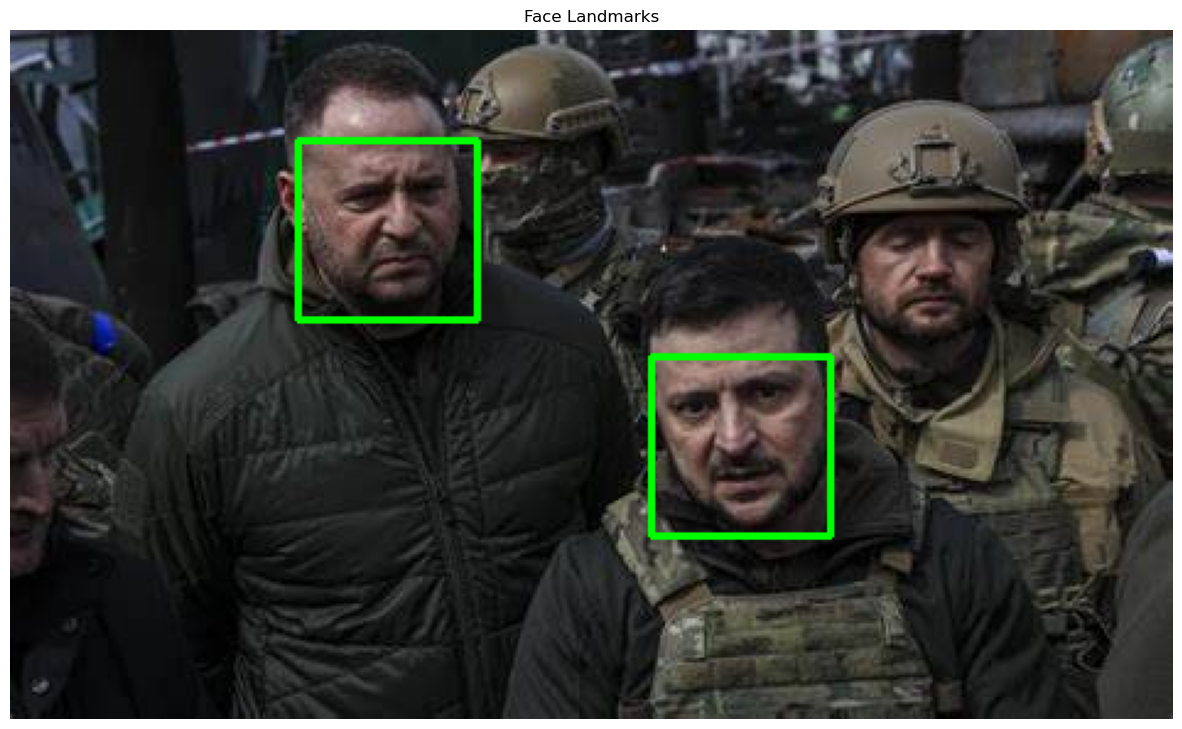

In [23]:
import cv2 
# Load the video 
video_path = 'trak.mp4' 
cap = cv2.VideoCapture(video_path) 
# Read the first frame ret, 
frame = cap.read() 
# Select ROI for tracking 
roi = cv2.selectROI(frame, False)

tracker_kcf = cv2.TrackerKCF_create()
ok = tracker_kcf.init(frame, roi)

frame_count = 0
while frame_count < 15:
    ret, frame = cap.read()
    if not ret:
        break

    ok, bbox = tracker_kcf.update(frame)
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

    cv2.imshow('KCF Tracker', frame)
    cv2.imwrite(f'frame_{frame_count}.jpg', frame)
    frame_count += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
roi = cv2.selectROI(frame, False)
cv2.destroyAllWindows()

tracker_csrt = cv2.TrackerCSRT_create()
ok = tracker_csrt.init(frame, roi)

frame_count = 0
while frame_count < 15:
    ret, frame = cap.read()
    if not ret:
        break

    ok, bbox = tracker_csrt.update(frame)
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)

    cv2.imshow('CSRT Tracker', frame)
    cv2.imwrite(f'csrt_frame_{frame_count}.jpg', frame)
    frame_count += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
